# WeRateDogs - Data wrangling 

## **Wrangle & Analyze the WeRateDogs Twitter Archive**

##### By Seif El-Eslam Hegazy

## Table-of-Contents

<a href="#intro">Introduction</a>

<a href="#gather">Gather Data</a>
    <ol>
        <li><a href="#gather_archive">Enhanced Twitter Archive</a></li>
        <li><a href="#gather_predictions">Image Predictions File</a></li>
        <li><a href="#gather_json_data">Download Tweet JSON Data</a></li>
    </ol>

<a href="#assess">Assess Data</a>
    <ul>
        <li><a href="#assess_archive">Archive</a></li>
        <li><a href="#assess_predictions">Predictions</a></li>
        <li><a href="#assess_json_data">Tweet JSON Data</a></li>
    </ul>

<a href="#summary">Assessment Summary</a>

<a href="#clean">Clean Data</a>

<a href="#analyze">Analyze & Visualiz Data</a>

---
<a id='intro'></a>
## Introduction
The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [112]:
# import pkgs
import os
import json
import time
import datetime
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import tweepy
%matplotlib inline


<a id='gather'></a>
## Gathering data

<a id='gather_archive'></a>
#### twitter-archive-enhanced.csv

The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_archive.shape

(2356, 17)

In [4]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='gather_predictions'></a>
#### image_predictions.tsv

 This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
if not os.path.exists(filename):
    response = requests.get(url)
    try:
        response.raise_for_status()

        with open(filename, mode = 'wb') as fh:
            fh.write(response.content)
    except:
        print('Can\'t get {} file'.format(filename))
else:
    print('{} file exists'.format(filename))

image-predictions.tsv file exists


In [6]:
df_image_prediction = pd.read_csv(filename, sep='\t' )

In [7]:
df_image_prediction.shape

(2075, 12)

In [8]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='gather_json_data'></a>
### Download Tweet JSON Data

Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [9]:
CONSUMER_KEY = os.environ.get('CONSUMER_KEY')
CONSUMER_SECRET = os.environ.get('CONSUMER_SECRET')
OAUTH_TOKEN = os.environ.get('OAUTH_TOKEN')
OAUTH_TOKEN_SECRET = os.environ.get('OAUTH_TOKEN_SECRET')

In [10]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

#### Get tweets data from Tweeter API

In [11]:
tweets_data_filename = 'tweet_json.txt'
if not os.path.exists(tweets_data_filename):
    tweet_ids = df_twitter_archive.tweet_id.values
    print('num of tweets to download = {}'.format(len(tweet_ids)))
    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = time.time()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open(tweets_data_filename, 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            #print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                #print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                #print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = time.time()
    print(end - start)
    print('num of failed tweets = {}'.format(len(fails_dict)))
else:
    print('{} file exists'.format(tweets_data_filename))

tweet_json.txt file exists


#### Read in Tweets data to DataFrame
Extract **tweet ID, retweet count, and favorite count** fields from each tweet's JSON data and store in a dataframe

In [12]:
tweets_data = []

with open(tweets_data_filename) as fh:
    while True:
        line = fh.readline()
        if not line:
            break
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_data = {'tweet_id': tweet_id, 
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweets_data.append(tweet_data)


In [13]:
# convert the tweet JSON data to a DataFrame
df_tweet_data = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8330,38089
1,892177421306343426,6154,32679
2,891815181378084864,4073,24595
3,891689557279858688,8474,41449
4,891327558926688256,9167,39623


---
<a id='Assess Data'></a>
## Assessing Data

<a id='assess_archive'></a>
### twitter-archive-enhanced.csv

- **Visual assessment**

In [14]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


> - name column has invalid strings, e.g. "a", "an", "in".
- name column has None values.

- **Programmatic assessment**

In [16]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**)
- There are 78 replies (**in_reply_to_status_id, in_reply_to_user_id**)
- There are 59 tweets with missing data in **expanded_urls** 
- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [17]:
# check if any duplicated rows
print("num of duplicated rows = {}".format(sum(df_twitter_archive.duplicated())))

num of duplicated rows = 0


#### "timestamp" column

In [18]:
# check timestamp column data type
str(type(df_twitter_archive.timestamp[0]))

"<class 'str'>"

> - timestamp column has dates in string form.

####  "name" column

In [19]:
# check name column if it has null values
df_twitter_archive['name'].isna().sum()

0

In [20]:
# unique values of name column
df_twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

> - some values are None, a, an, my, his, ..

In [21]:
# count rows that have name of 'None'
df_twitter_archive[df_twitter_archive['name'] == 'None'].shape[0]

745

In [22]:
# count all names that are not capitalized
df_twitter_archive[df_twitter_archive['name'].str.contains('^[a-z]', regex = True)]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
actually         2
not              2
getting          2
old              1
light            1
such             1
all              1
infuriating      1
space            1
unacceptable     1
my               1
life             1
his              1
officially       1
by               1
this             1
incredibly       1
Name: name, dtype: int64

In [23]:
df_twitter_archive[df_twitter_archive['name'].str.contains('^[a-z]', regex = True)].shape

(109, 17)

#### "expanded_urls" column

In [24]:
# let's investigate 'expanded_urls' deeply
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [25]:
# how many missing expanded_urls are retweet or replies?
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull() &
                   df_twitter_archive['in_reply_to_status_id'].notnull()
                   & df_twitter_archive['in_reply_to_user_id'].notnull()].shape

(55, 17)

#### "source" column

In [26]:
# let's investigate 'source' column
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> **'source'** column has 4 unique values **[Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck]**

#### columns [doggo, floofer, pupper, puppo]

In [27]:
# let's have a look on columns [doggo, floofer, pupper, puppo]
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### 'rating_numerator' and 'rating_denominator' columns

In [31]:
# let's check 'rating_numerator' and 'rating_denominator' columns
df_twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [32]:
# let's check 'rating_numerator' and 'rating_denominator' columns for replaies and retweets
df_twitter_archive[df_twitter_archive['in_reply_to_status_id'].notnull()
                   & df_twitter_archive['in_reply_to_user_id'].notnull()]\
[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,78.000000,78.000000
mean,40.794872,11.679487
std,138.413681,13.694718
min,0.000000,0.000000
25%,11.000000,10.000000
50%,12.000000,10.000000
75%,13.000000,10.000000
max,960.000000,130.000000


> - minimum value for both *'rating_numerator' and 'rating_denominator'* = 0 !!
- maximum value for  *'rating_numerator'* = 1776
- maximum value for *'rating_denominator'* = 170
- 75% of *'rating_numerator'* values = 13
- 75% of *'rating_denominator'* values = 10

In [33]:
# how many 'rating_numerator' values > 13 ?
df_twitter_archive[df_twitter_archive['rating_numerator'] > 13].shape

(82, 17)

In [34]:
df_twitter_archive[df_twitter_archive['rating_numerator'] > 13]['rating_numerator'].value_counts()

14      54
15       2
75       2
420      2
45       1
144      1
17       1
20       1
24       1
666      1
27       1
165      1
44       1
121      1
143      1
182      1
60       1
960      1
204      1
80       1
84       1
88       1
99       1
26       1
1776     1
50       1
Name: rating_numerator, dtype: int64

In [35]:
# how many 'rating_numerator' values = 0 ?
df_twitter_archive[df_twitter_archive['rating_numerator'] == 0].shape

(2, 17)

In [36]:
# how many 'rating_denominator' values > 10 ?
df_twitter_archive[df_twitter_archive['rating_denominator'] > 10].shape

(20, 17)

In [37]:
df_twitter_archive[df_twitter_archive['rating_denominator'] > 10]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
120    1
150    1
16     1
15     1
110    1
170    1
40     1
70     1
130    1
Name: rating_denominator, dtype: int64

In [38]:
# how many 'rating_denominator' values = 0 ?
df_twitter_archive[df_twitter_archive['rating_denominator'] == 0].shape

(1, 17)

---
<a id='assess_predictions'></a>
### image_predictions.tsv


- **Visual assessment**

In [39]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
df_image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


- **Programmatic assessment**

In [41]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
df_image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [43]:
df_image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [44]:
df_image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [45]:
# how many False dog prediction?
df_image_prediction[~df_image_prediction.p1_dog & ~df_image_prediction.p2_dog & ~df_image_prediction.p3_dog].shape

(324, 12)

> - There are 324 rows where there is false dog breed prediction.
> - The best prediction for dog breed could be combined with the twitter archive table.

---
<a id='assess_json_data'></a>
### tweet_json.txt
- Visual assessment

In [46]:
df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8330,38089
1,892177421306343426,6154,32679
2,891815181378084864,4073,24595
3,891689557279858688,8474,41449
4,891327558926688256,9167,39623


In [47]:
df_tweet_data.tail()

,tweet_id,retweet_count,favorite_count
2335,666049248165822465,41,107
2336,666044226329800704,139,294
2337,666033412701032449,43,124
2338,666029285002620928,47,128
2339,666020888022790149,503,2543


- Programmatic assessment

In [48]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [49]:
df_tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2934.637607,7976.021795
std,6.832564e+16,4943.049421,12350.111679
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,590.000000,1377.500000
50%,7.186224e+17,1371.000000,3470.500000
75%,7.986954e+17,3420.750000,9766.250000
max,8.924206e+17,83795.000000,164524.000000


---
<a id='summary'></a>
### Assessment Summary

#### Quality:

- **twitter-archive-enhanced.csv**

    1- There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).
    
    2- There are 78 reply tweets (**in_reply_to_status_id, in_reply_to_user_id**).

    3- There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data.
    
    4- The **timestamp** column is in string format.
    
    5- There are 109 tweets with lowercase words that are invalid names in **name** column.
    
    6- There are only 4 types of values in the **source** column, and they can be extracted from anchore tag text.
    
    7- Some tweets with **rating_denominator** NOT equal to 10. Some have **rating_numerator** > 13


- **image_predictions.tsv**

    8- There are 2075 image predictions, 281 less than the number of tweets in the twitter-archive-enhanced.csv, so will be classified as "missing data". 


- **tweet_json.txt**

    9- 16 tweets are missing from the twitter-archive-enhanced.csv.
    
    
#### Tidiness

- **twitter-archive-enhanced.csv**

    1- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**). The 4 columns are for one variable so, they don't confirm to the rules of "tidy data".
    
    2- The **Key Points** indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**.
    
    3- Columns **in_reply_to_status_id, in_reply_to_user_id** are not related to tweets data.
    
    4- All **rating_denominator**values are equal to (10), So, this column is no longer needed.


- **image_predictions.tsv**

    5- The dog breed prediction with the highest confidence level can be combined with the twitter-archive-enhanced.csv dataframe as the twitter table contains information that is all about the dog in the tweet.


- **tweet_json.txt**

    6- This dataframe should be combined with the twitter-archive-enhanced.csv dataframe.

---
<a id='clean'></a>
## Cleaning Data

In [50]:
# create copies of the dataframes for cleaning
twitter_archive_clean = df_twitter_archive.copy()
image_prediction_clean = df_image_prediction.copy()
tweet_data_clean = df_tweet_data.copy()

#### Quality issue#1

There are 181 retweets, and we’re only interested in “original tweets”.

- define

Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

- code

In [51]:
sum(twitter_archive_clean.retweeted_status_id.notnull())

181

In [52]:
twitter_archive_clean.shape

(2356, 17)

In [53]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

- test

In [54]:
twitter_archive_clean.shape # 2356 - 181

(2175, 17)

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Quality issue#2

There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).

- define

Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

- code

In [56]:
sum(twitter_archive_clean.in_reply_to_status_id.notnull())

78

In [57]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

- test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Quality issue#3

There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.

- define

Drop tweets with missing data in the expanded_urls.

- code

In [59]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

- test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

#### Quality issue#4

The timestamp column is in string format.

- define

Convert timestamp to datetime data type.

Extract day of week/ month.

- code

In [61]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.dt.floor('s')

In [62]:
# add week day to the dataset for further analysis
twitter_archive_clean['day_of_week'] = twitter_archive_clean['timestamp'].dt.weekday
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month

- test

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

#### Quality issue#5

There are 109 tweets with lowercase words that are invalid names in name column.

- define

Replace all lowercase words in the name column with the string "None".

- code

In [64]:
names_mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)

In [65]:
twitter_archive_clean.loc[names_mask, 'name'] = "None"

- test

In [66]:
twitter_archive_clean[names_mask].name.value_counts().sort_index()

None    104
Name: name, dtype: int64

#### Quality issue#6

There are only 4 types of values in the source column, and they can be extracted from anchore tag text.

- define

Extracte source from anchore tag text.

- code

In [67]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

- test

In [68]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### Quality issue#7

Some tweets with **rating_denominator** NOT equal to 10. Some have **rating_numerator** > 13

- define

Drop tweets with rating_denominator values that are NOT equal to 10.

Drop tweets with rating_numerator values that are > 13.

- code

In [69]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator <= 13]

- test

In [70]:
twitter_archive_clean.rating_denominator.value_counts()

10    2034
Name: rating_denominator, dtype: int64

In [71]:
twitter_archive_clean.rating_numerator.value_counts()

12    485
10    434
11    413
13    287
9     152
8      98
7      51
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

#### Tidiness issue#1

There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns are for one variable so, they don't confirm to the rules of "tidy data".

- define
Merge these 4 columns in one column, then drop them.

- code

In [72]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2034,2034,2034,2034
unique,2,2,2,2
top,None,None,None,None
freq,1959,2024,1813,2011


In [73]:
# https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [74]:
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].apply(lambda x: sorted(list({i for i in x.split(',')}))[-1])

In [75]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

- test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2034 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2034 non-null   datetime64[ns, UTC]
 4   source                      2034 non-null   object             
 5   text                        2034 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2034 non-null   object             
 10  rating_numerator            2034 non-null   int64           

In [77]:
twitter_archive_clean['stage'].value_counts()

None       1716
pupper      221
doggo        64
puppo        23
floofer      10
Name: stage, dtype: int64

#### Tidiness issue#2

The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

- define

Drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

- code

In [78]:
twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1, inplace=True)

- test

In [79]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2034 non-null   int64              
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              2034 non-null   datetime64[ns, UTC]
 4   source                 2034 non-null   object             
 5   text                   2034 non-null   object             
 6   expanded_urls          2034 non-null   object             
 7   rating_numerator       2034 non-null   int64              
 8   rating_denominator     2034 non-null   int64              
 9   name                   2034 non-null   object             
 10  day_of_week            2034 non-null   int64              
 11  month                  2034 non-null   int64            

#### Tidiness issue#3

Columns **in_reply_to_status_id, in_reply_to_user_id** are not related to tweets data.

- define

Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

- code

In [80]:
twitter_archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1, inplace=True)

- test

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   int64              
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   expanded_urls       2034 non-null   object             
 5   rating_numerator    2034 non-null   int64              
 6   rating_denominator  2034 non-null   int64              
 7   name                2034 non-null   object             
 8   day_of_week         2034 non-null   int64              
 9   month               2034 non-null   int64              
 10  stage               2034 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 190.7+ KB


#### Tidiness issue#4

Column **rating_denominator** has the same value. So, no need for it

- define

Drop column rating_denominator.

Rename the rating_numerator column to be rating.

- code

In [82]:
twitter_archive_clean.drop(['rating_denominator'], axis = 1, inplace=True)

In [83]:
twitter_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

- test

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2034 non-null   int64              
 1   timestamp      2034 non-null   datetime64[ns, UTC]
 2   source         2034 non-null   object             
 3   text           2034 non-null   object             
 4   expanded_urls  2034 non-null   object             
 5   rating         2034 non-null   int64              
 6   name           2034 non-null   object             
 7   day_of_week    2034 non-null   int64              
 8   month          2034 non-null   int64              
 9   stage          2034 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 174.8+ KB


#### Tidiness issue#5

The dog breed prediction with the highest confidence level can be combined with the twitter-archive-enhanced.csv dataframe as the twitter table contains information that is all about the dog in the tweet.Column 

- define


> - Create two new columns in **predictions** called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
> - Copy the associated confidence level into the new `confidence` column.
> - For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
> - Drop none breeds rows

> - Merge the new `breed` and `confidence` columns into the twitter-archive-enhanced.csv dataframe, using an 'inner' join so that we are left with only tweets _with_ images.
> - Now we can fix the `confidence` column; round the values up to a whole number in percentage format.

- code

In [85]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(image_prediction_clean['p1_dog'] == True),
              (image_prediction_clean['p2_dog'] == True),
              (image_prediction_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [image_prediction_clean['p1'], 
                 image_prediction_clean['p2'],
                 image_prediction_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [image_prediction_clean['p1_conf'], 
                      image_prediction_clean['p2_conf'], 
                      image_prediction_clean['p3_conf']]

# select the predicted breed based on the first successful condition
image_prediction_clean['breed'] = np.select(conditions, choices_breed, default = 'none')

# select the predicted confidence level based on the first successful condition
image_prediction_clean['confidence'] = np.select(conditions, choices_confidence, default = 0)

In [96]:
# shape befor dropping none breed rows
image_prediction_clean.shape

(2075, 14)

In [97]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['breed'] != 'none']

In [98]:
# shape after dropping none breed rows
image_prediction_clean.shape

(1751, 14)

In [99]:
# merge the breed and confidence columns to twitter archive
mask_cols = ['tweet_id', 'breed', 'confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
twitter_archive_clean.confidence = (twitter_archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
image_prediction_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

- test

In [100]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1626 non-null   int64              
 1   timestamp      1626 non-null   datetime64[ns, UTC]
 2   source         1626 non-null   object             
 3   text           1626 non-null   object             
 4   expanded_urls  1626 non-null   object             
 5   rating         1626 non-null   int64              
 6   name           1626 non-null   object             
 7   day_of_week    1626 non-null   int64              
 8   month          1626 non-null   int64              
 9   stage          1626 non-null   object             
 10  breed          1626 non-null   object             
 11  confidence     1626 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(6)
memory usage: 165.1+ KB


In [101]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,day_of_week,month,stage,breed,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,1,8,None,Chihuahua,32
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,0,7,None,Chihuahua,71
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,6,7,None,Labrador_retriever,16
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,5,7,None,basset,55
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,None,5,7,None,Chesapeake_Bay_retriever,42


#### Tidiness issue#6

tweet_json.txt dataframe should be combined with the twitter-archive-enhanced.csv dataframe.

- define

Merge the retweet_count and favorite_count columns to the twitter archive , joining on tweet_id.

- code

In [102]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, 
                         on = 'tweet_id', how = 'left')

- test

In [103]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1626 non-null   int64              
 1   timestamp       1626 non-null   datetime64[ns, UTC]
 2   source          1626 non-null   object             
 3   text            1626 non-null   object             
 4   expanded_urls   1626 non-null   object             
 5   rating          1626 non-null   int64              
 6   name            1626 non-null   object             
 7   day_of_week     1626 non-null   int64              
 8   month           1626 non-null   int64              
 9   stage           1626 non-null   object             
 10  breed           1626 non-null   object             
 11  confidence      1626 non-null   int64              
 12  retweet_count   1624 non-null   float64            
 13  favorite_count  1624 non-null   f

#### Quality issue#8,9

Missing data from image_predictions.tsv & tweet_json.txt should be removed.

- define

 No action needed as these issues are solved by pervious cleaning steps

---
## Storing Data

The cleaned twitter archive data in `twitter archive_clean` dataframe is ready for the analysis phase. The `image predictions_clean` and `tweet_data_clean` tables have not been cleaned as they will not be used again. Now we store the `twitter_archive_clean` table into the 'twitter_archive_master.csv' file.

In [104]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

---
<a id='analyze'></a>
## Analyzing, and Visualizing Data

> #### Analyzing, and visualizing data helps answering the following questions:
   - What are the most/less common dog breeds?
   - What are the ratings for the most common dog breeds?
   - What is the heighest rated dog breed ?
   - What dog breeds have the highest overall favourite counts?
   - What is the tweets distribution by month/week day?

####  What are the most/less common dog breeds?

In [105]:
twitter_archive_clean['breed'].value_counts()

golden_retriever        151
Labrador_retriever      102
Pembroke                 90
Chihuahua                88
pug                      62
                       ... 
standard_schnauzer        1
silky_terrier             1
Irish_wolfhound           1
Bouvier_des_Flandres      1
Japanese_spaniel          1
Name: breed, Length: 112, dtype: int64

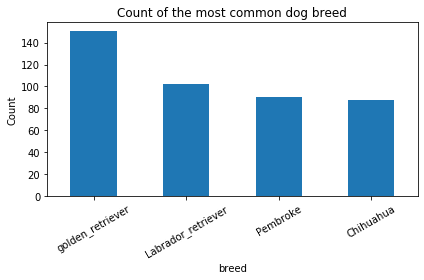

In [187]:
most_common_breed = twitter_archive_clean.groupby('breed').filter(lambda x: len(x) >= 80)

most_common_breed['breed'].value_counts().plot(kind = 'bar', rot=30)
plt.title('Count of the most common dog breed')
plt.xlabel('breed')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('most_common_breeds.svg', format='svg');

> the most common breeds are: **golden_retriever, Labrador_retriever, Pembroke, Chihuahua**

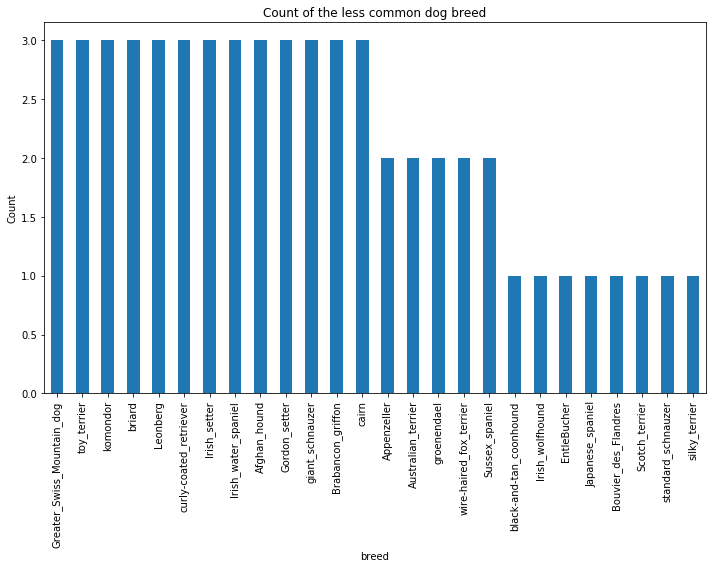

In [190]:
less_common_breed = twitter_archive_clean.groupby('breed').filter(lambda x: len(x) <= 3)
plt.figure(figsize=(10,8));
less_common_breed['breed'].value_counts().plot(kind = 'bar')
plt.title('Count of the less common dog breed')
plt.xlabel('breed')
plt.ylabel('Count');
plt.tight_layout()
plt.savefig('less_common_breeds.svg', format='svg');

####  What are the ratings for the most common dog breeds?

In [107]:
df_common= twitter_archive_clean[twitter_archive_clean['breed'].isin(
    ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua'])]

In [109]:
df_common.groupby('breed')['rating'].mean().sort_values(ascending=False)

breed
golden_retriever      11.523179
Pembroke              11.311111
Labrador_retriever    11.176471
Chihuahua             10.500000
Name: rating, dtype: float64

 #### What is the heighest rated dog breed ?

In [110]:
twitter_archive_clean.groupby('breed')['rating'].mean().sort_values(ascending=False)[:5]

breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
Name: rating, dtype: float64

#### What dog breeds have the highest overall favourite counts?

In [117]:
favourite_breeds = twitter_archive_clean.sort_values(by = 'favorite_count', ascending = False).head(10)

In [120]:
favourite_breeds[['breed', 'favorite_count'] ]

,breed,favorite_count
660,Labrador_retriever,164524.0
262,Lakeland_terrier,140616.0
339,Chihuahua,127238.0
95,French_bulldog,122083.0
687,Eskimo_dog,121530.0
50,English_springer,104162.0
116,malamute,90832.0
1193,Bedlington_terrier,82477.0
82,golden_retriever,82037.0
341,cocker_spaniel,80484.0


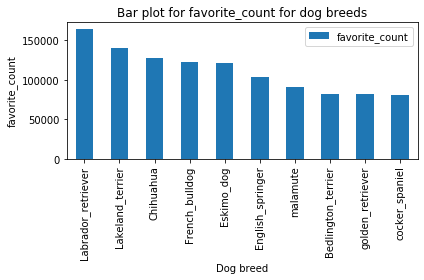

In [192]:
favourite_breeds[['breed', 'favorite_count']].plot(x='breed', y = 'favorite_count', kind="bar")
plt.title('Bar plot for favorite_count for dog breeds')
plt.xlabel('Dog breed')
plt.ylabel('favorite_count');
plt.tight_layout()
plt.savefig('favorit_breeds.svg', format='svg');

> Dog breeds that have highest favorite_count are: 

> **Labrador_retriever, Lakeland_terrier, Chihuahua, French_bulldog, Eskimo_dog, English_springer, malamute, Bedlington_terrier, golden_retriever, cocker_spaniel**

#### What is the tweets distribution by month/week day?

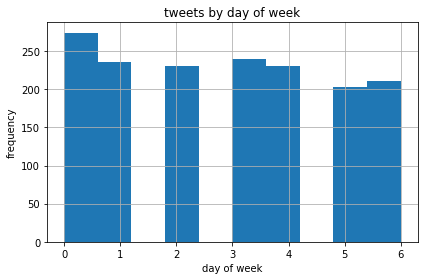

In [193]:
twitter_archive_clean['day_of_week'].hist();
plt.title('tweets by day of week')
plt.xlabel('day of week')
plt.ylabel('frequency');
plt.tight_layout()
plt.savefig('tweets_by_day.svg', format='svg');

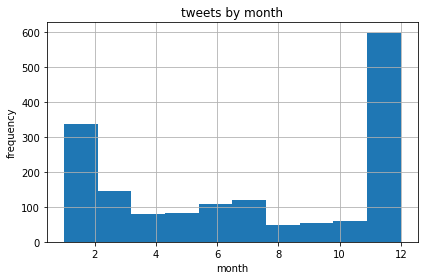

In [188]:
twitter_archive_clean['month'].hist();
plt.title('tweets by month')
plt.xlabel('month')
plt.ylabel('frequency');
plt.tight_layout()
plt.savefig('tweets_by_month.svg', format='svg');

> **Highest day of tweets is Monday**

> **Highest month of tweets is December**